Explanation of the dataset:

No. of Columns: 15

Dependent variable: Delivery_Status

Task: Classification

NA's: Yes

Explanation of the Columns:

Year: The Year the data was collected

Month: The Month in which the data was collected

DayofMonth: The day of the month

DayofWeek: The day of Week

Actual_Shipment_Time: The Actual time when the package was sent for shipment. (ex: 1955 means 19 hours and 55 minutes i.e 7:55 PM)

Planned_Shipment_Time: The time when the package should have been sent for shipment. (ex: 1955 means 19 hours and 55 minutes i.e 7:55 PM)

Planned_Delivery_Time: The time when the package should be delivered. (ex: 1955 means 19 hours and 55 minutes i.e 7:55 PM)

Carrier_Name: The name of the Carrier which carried the package.

Carrier_Num: The number of the Carrier which carried the package.

Planned_TimeofTravel: The estimated time to reach from Source to Destination. ( in minutes)

Shipment_Delay: The time by which the package was shipped late. (in minutes. Negative value indicates that the package was shipped early. Ex: 4 indicates that the package was shipped 4 minutes late, whereas, -4 indicates that the package was shipped 4 minutes early)

Source: The place from which the package was shipped.

Destination: The place at which the package was delivered.

Distance: Distance between Source and Destination in miles.

Delivery_Status: Whether it got delivered at right time or not. (Dependent Variable)
  

Expectation & Point to Remember:

CRISP-ML(Q) framework has to be implemented and a document has to be created with all sections completely filled. 
Apply EDA, Feature Engineering, Data Visualization, Unsupervised Learning and finally Supervised Learning. Also take the categorical variables and perform wordcloud. 
Get as innovative as possible because this is the right sized dataset to get complete understanding on end to end pipeline building. 

Accuracy of the model should be greated than 90%. 
If you get 100% accuracy then something is wrong with the way you handled the dataset.
Use Google Colab to avoid running out of memory issues. 

## Using CRISP-Ml(Q) methodlogy

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing dataset
df = pd.read_csv('/Users/abhinavpandey/Desktop/Python/Projects/FedEx 360/fedex.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


## EDA
**applying auto eda with sweetviz**

Using sweetviz to automate EDA is pretty simple and straight forward. 3 simple steps will provide a detailed report in html page.


In [5]:
#importing autoEDA library
import sweetviz as sv

                                             |      | [  0%]   00:00 -> (? left)


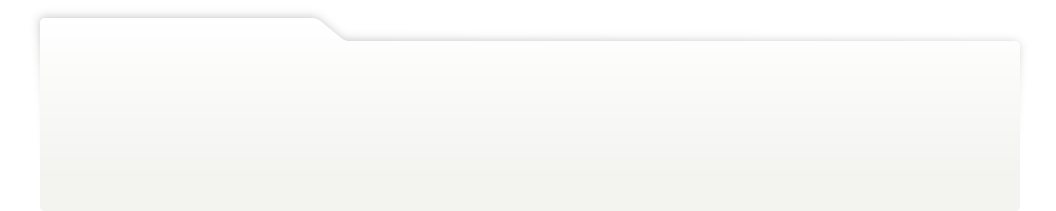
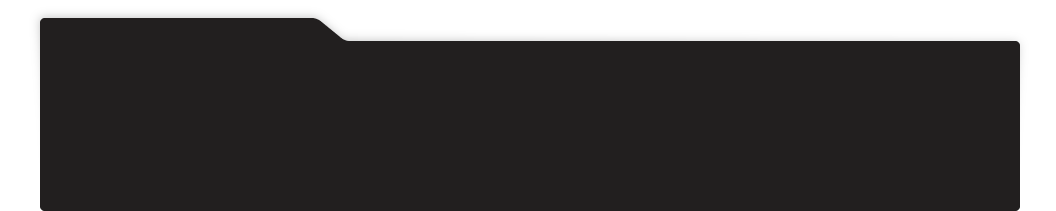
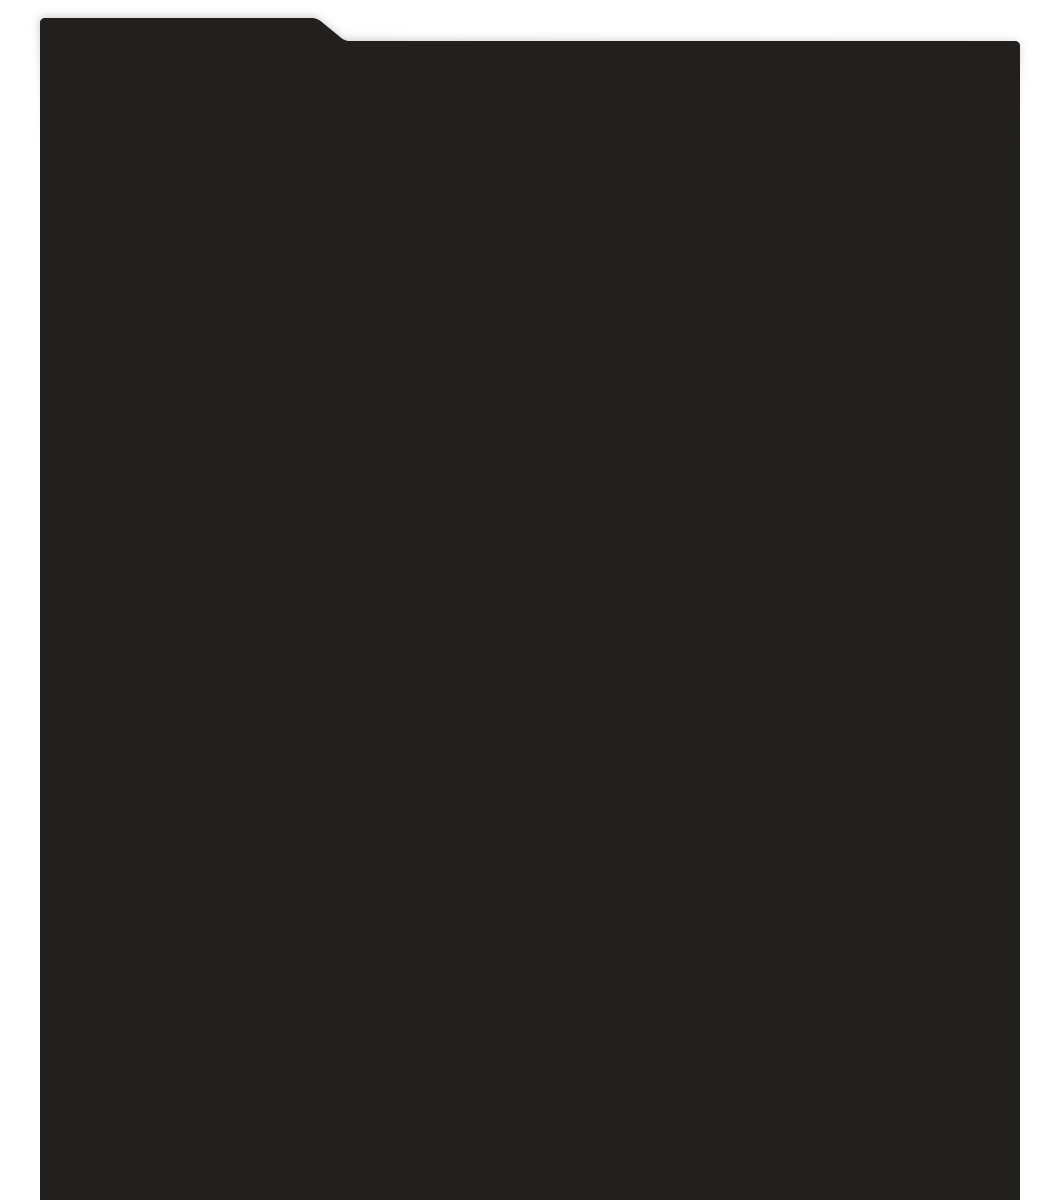
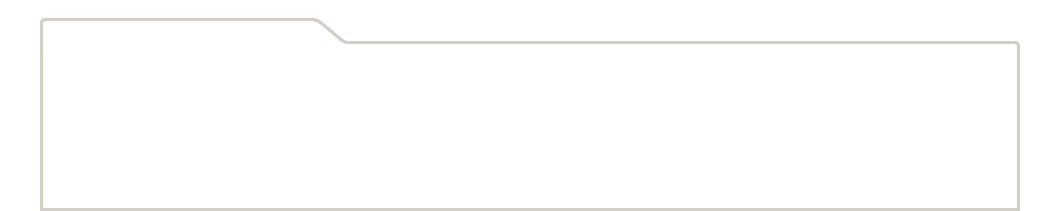
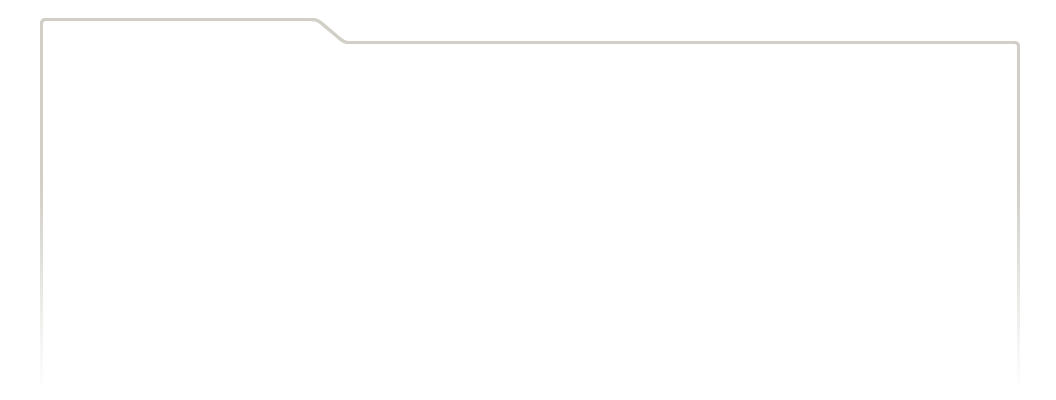
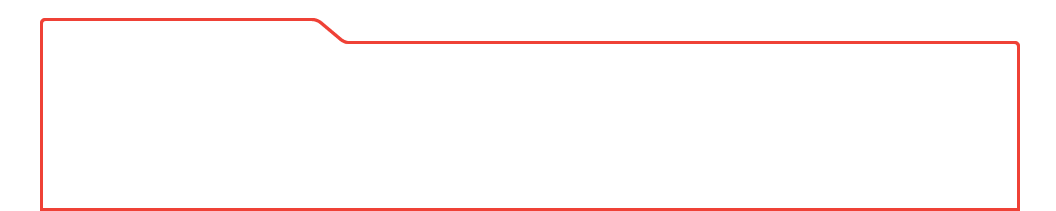
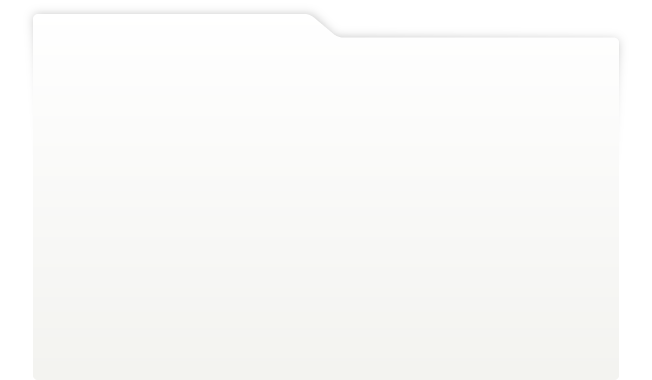
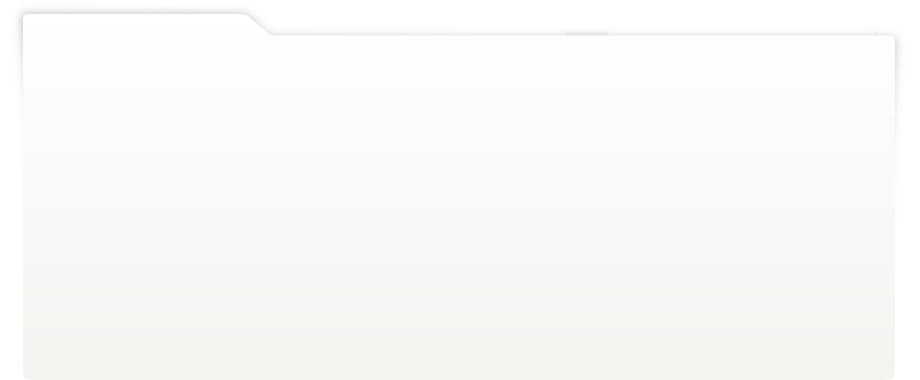
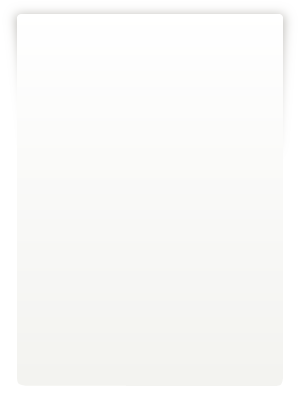
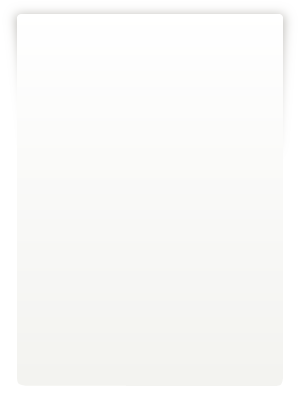
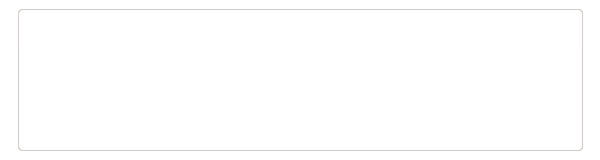
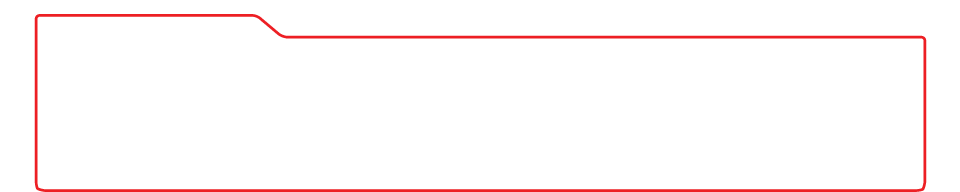
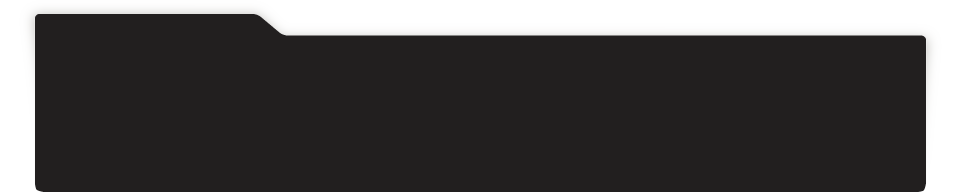
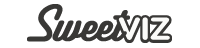
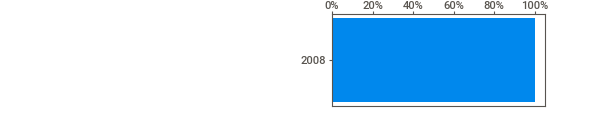
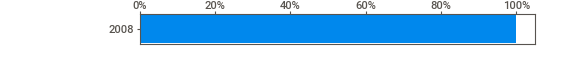
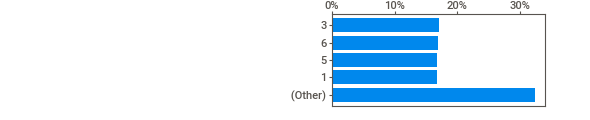
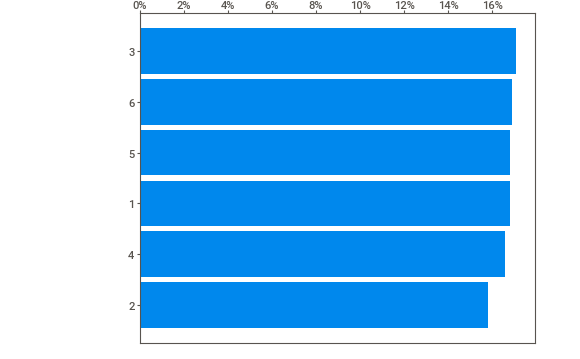
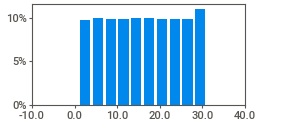
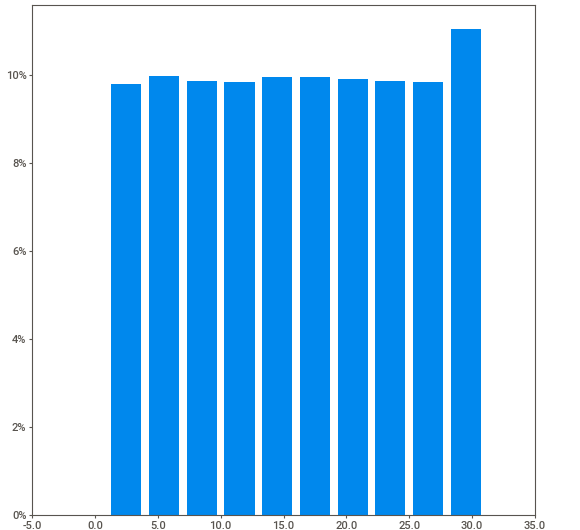
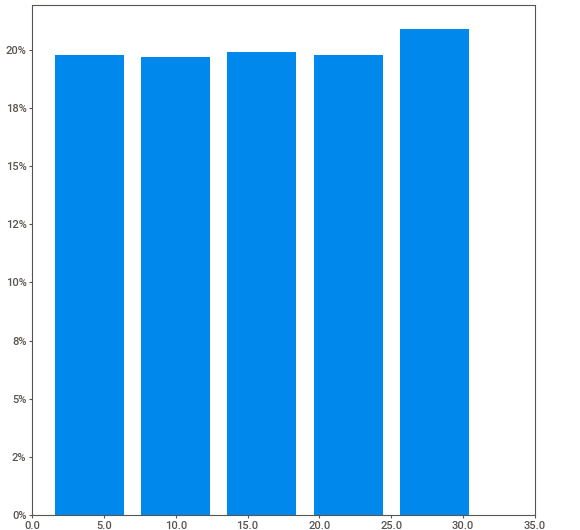
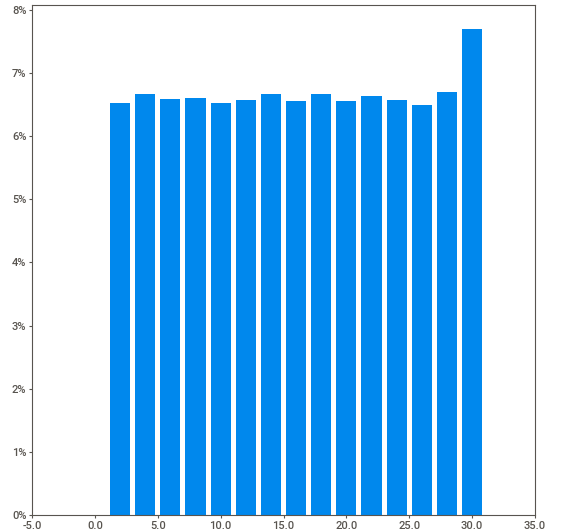
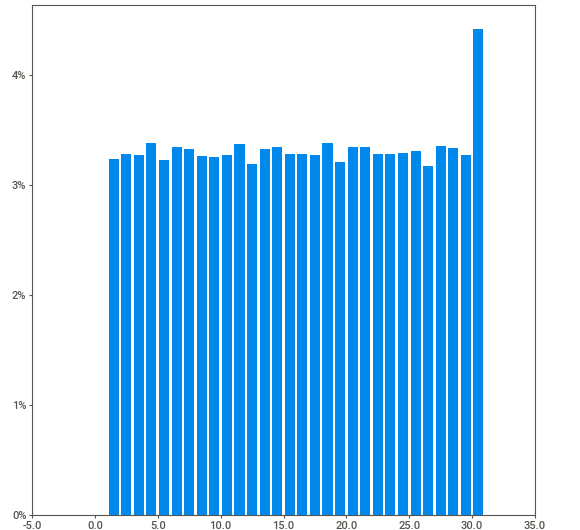
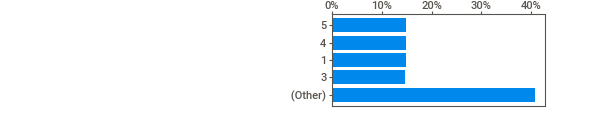
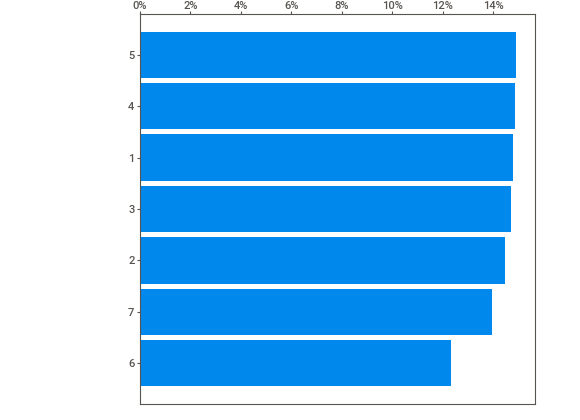
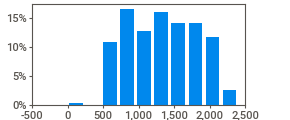
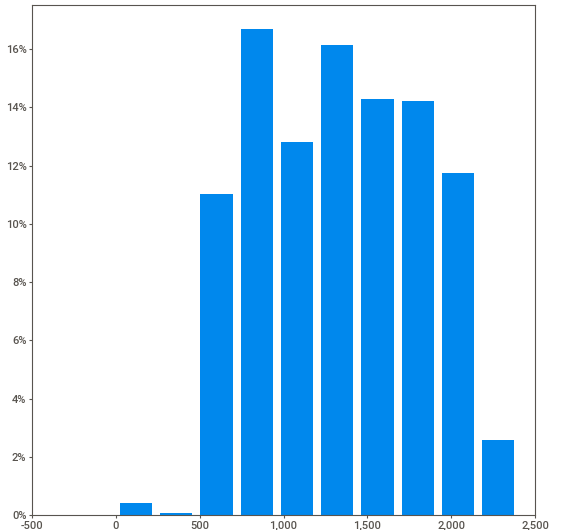
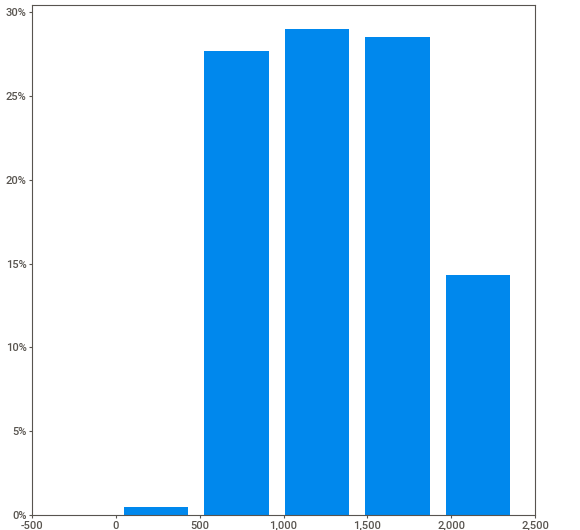
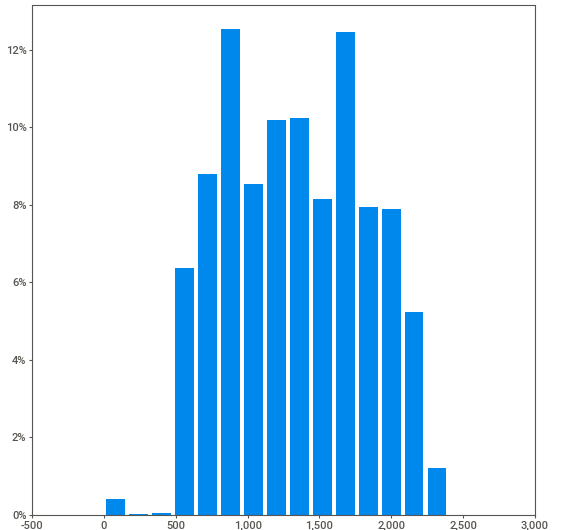
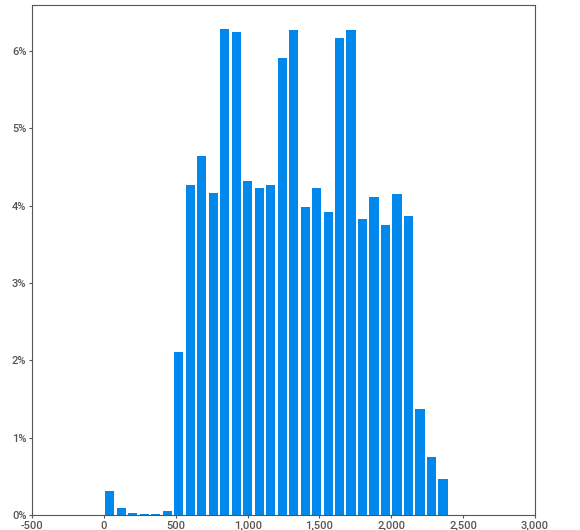
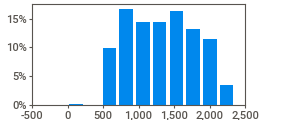
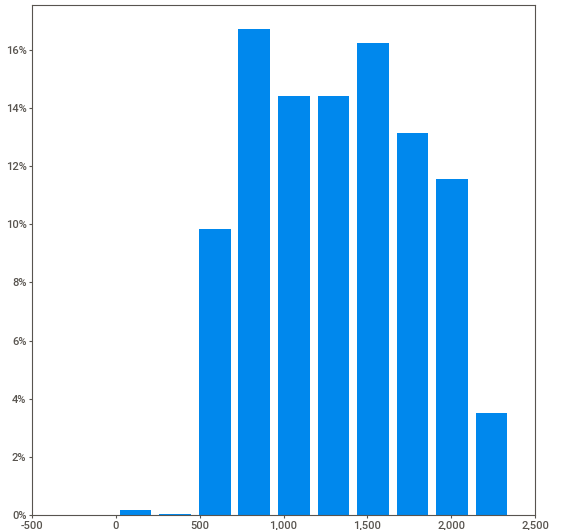
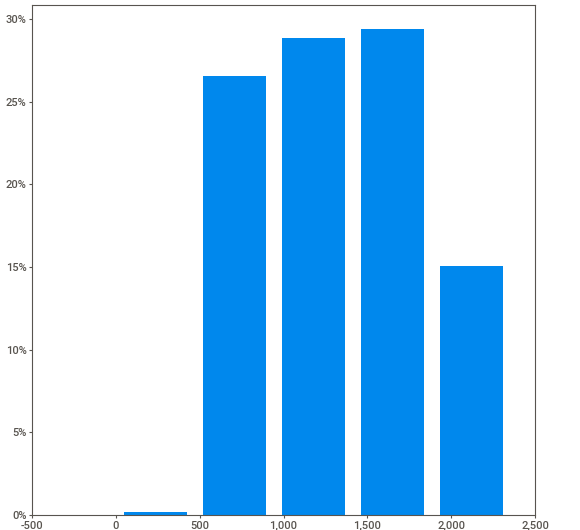
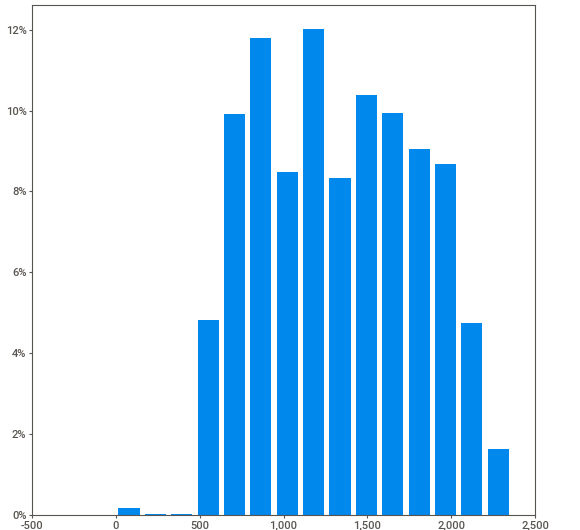
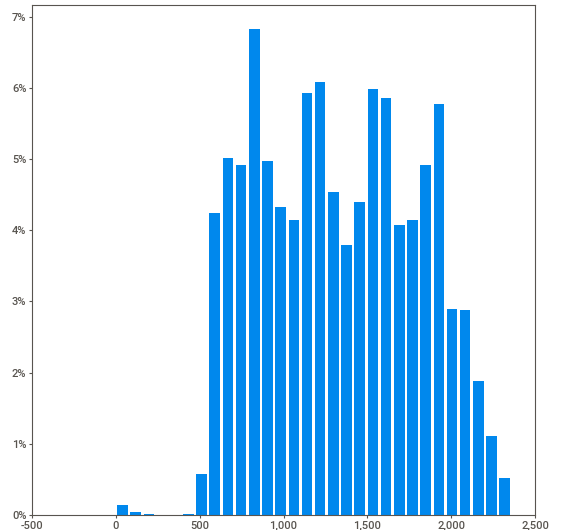
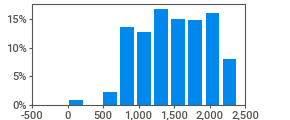
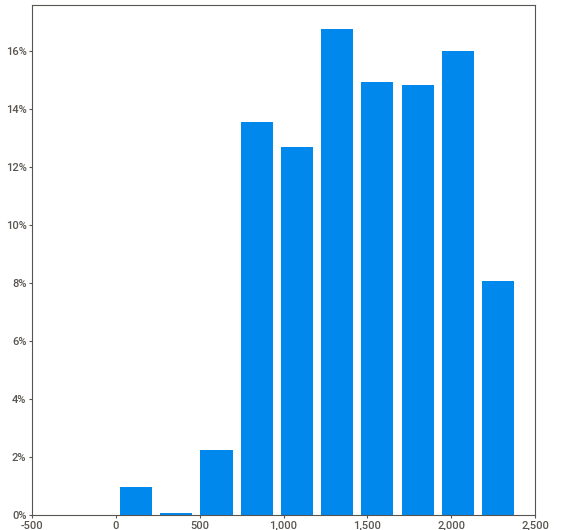
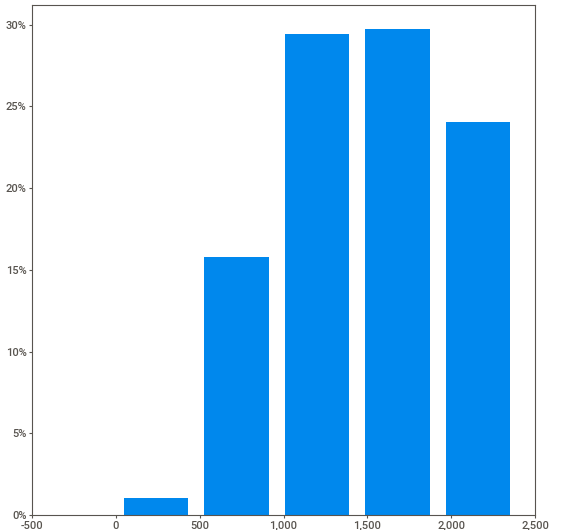
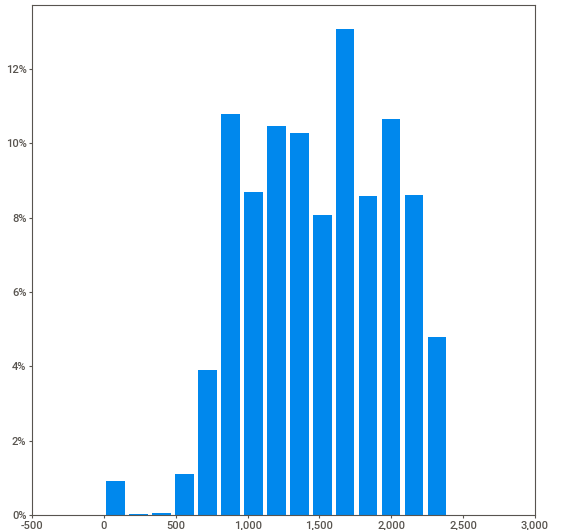
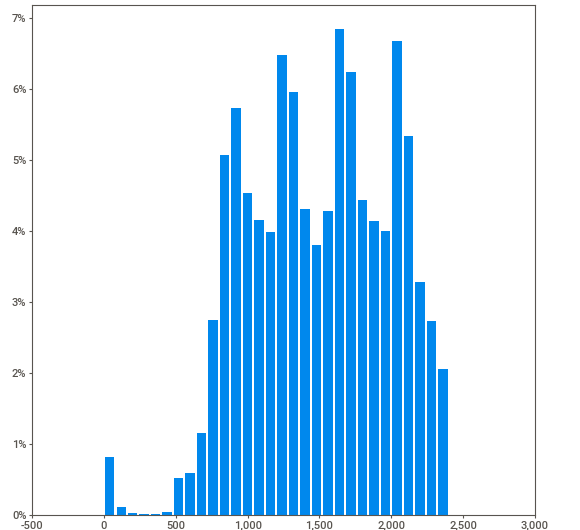
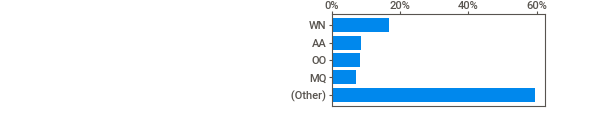
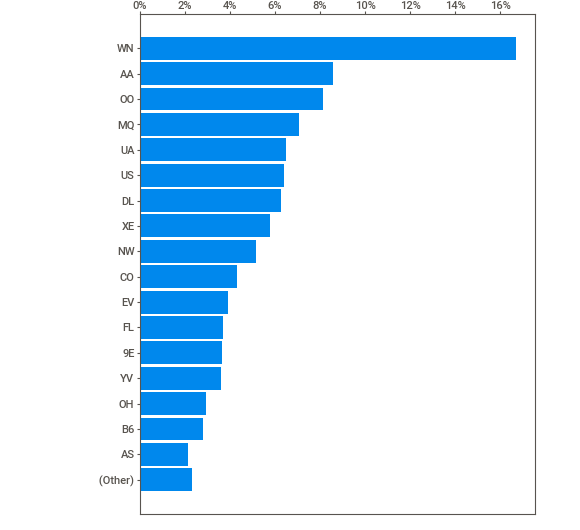
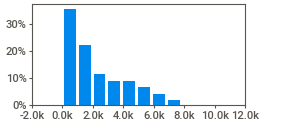
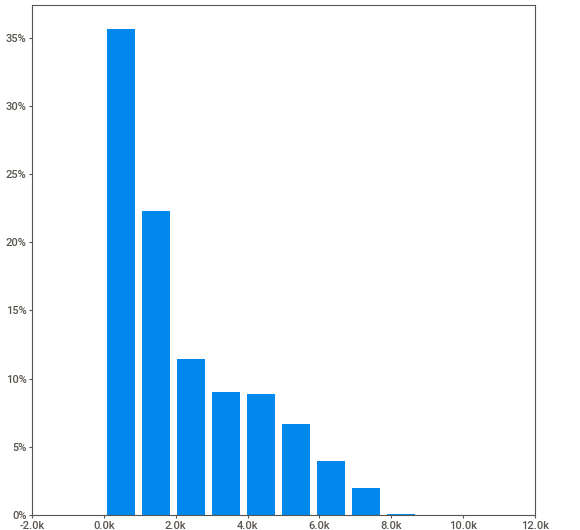
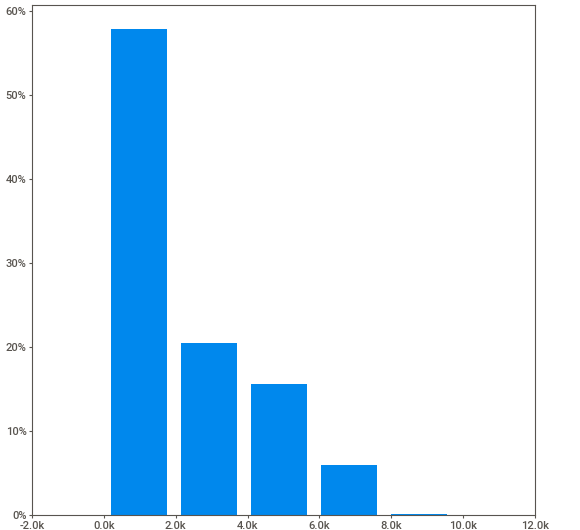
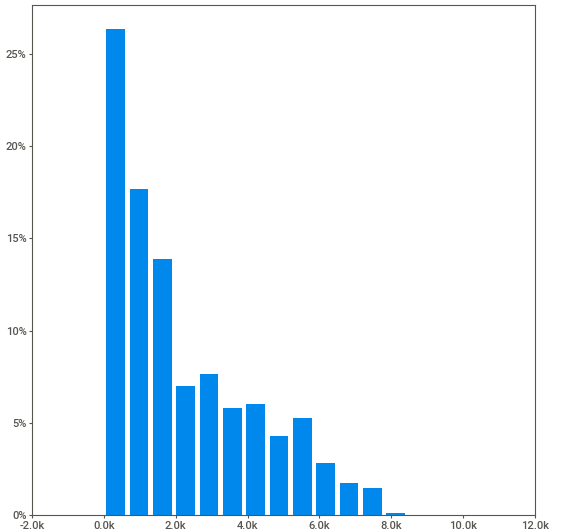
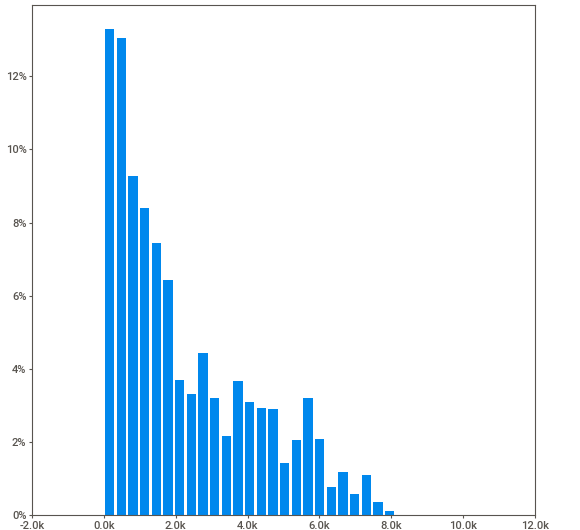
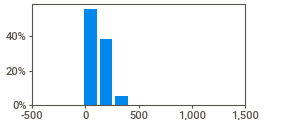
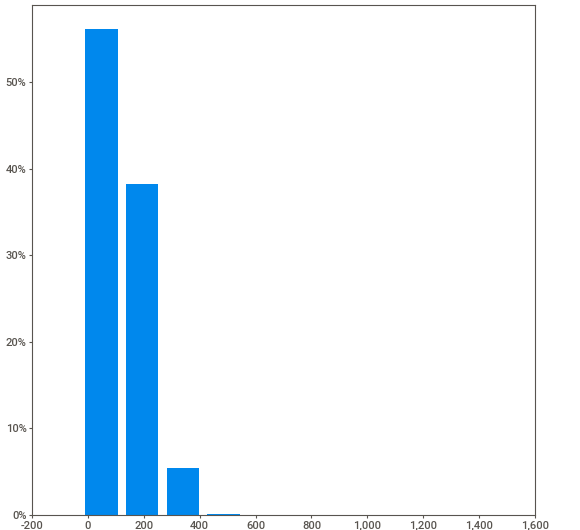
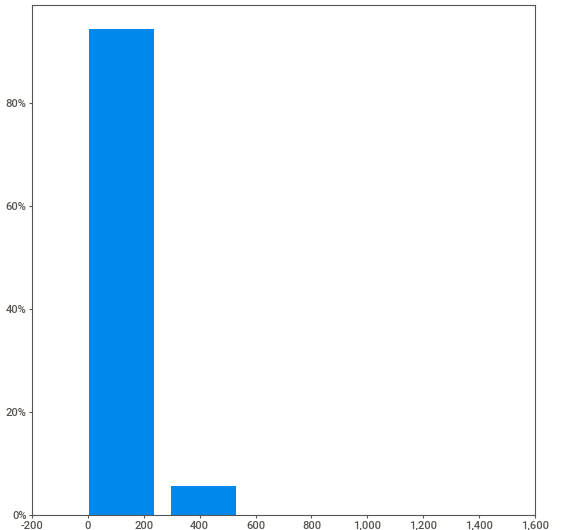
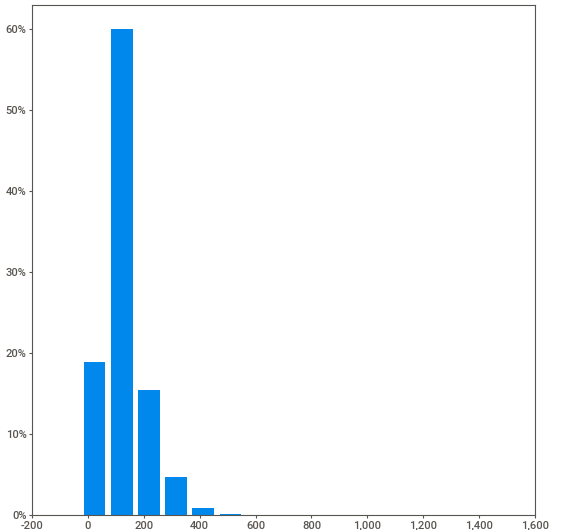
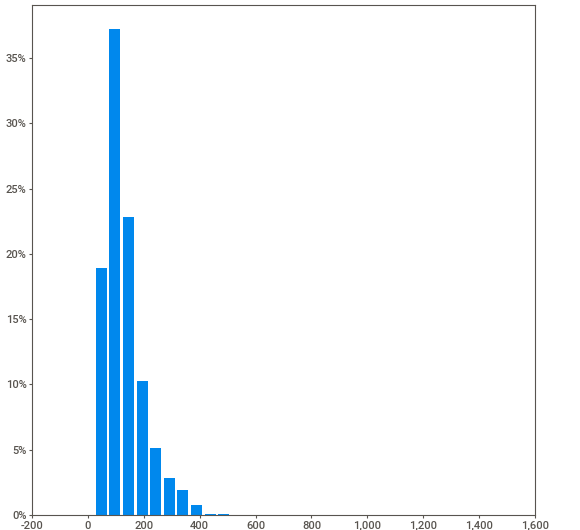
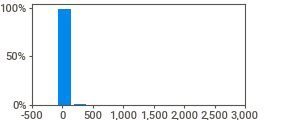
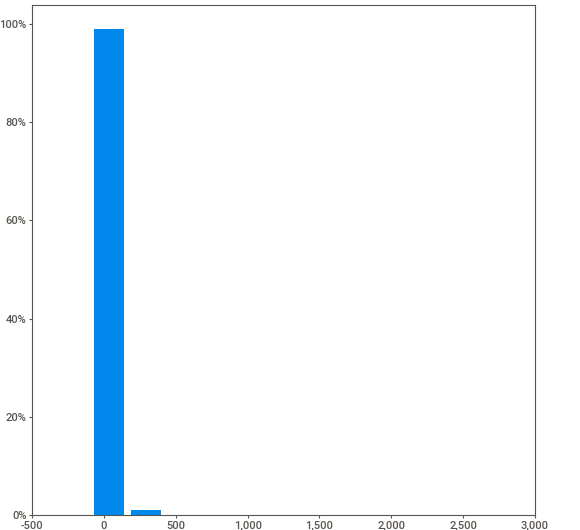
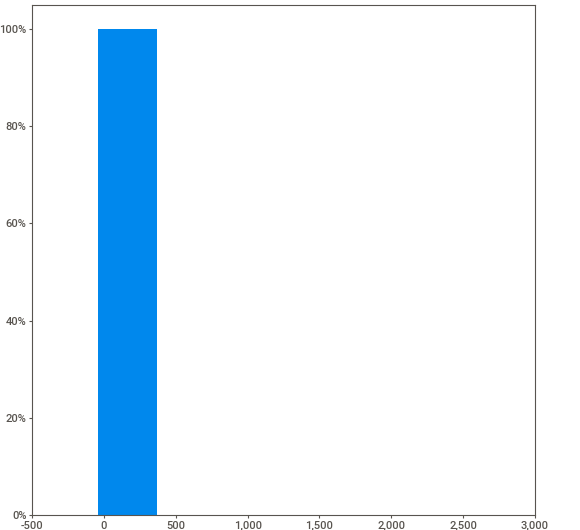
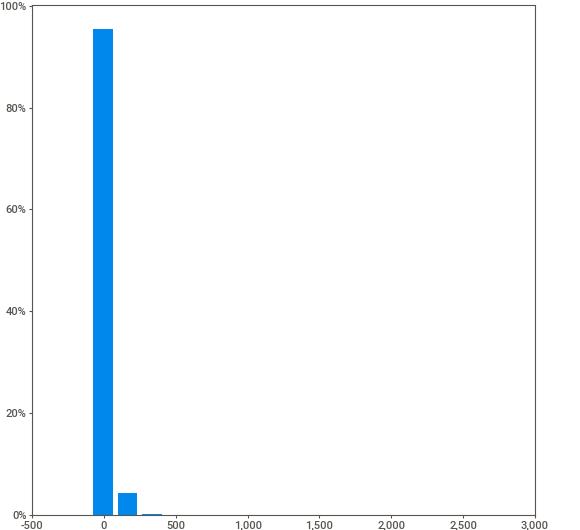
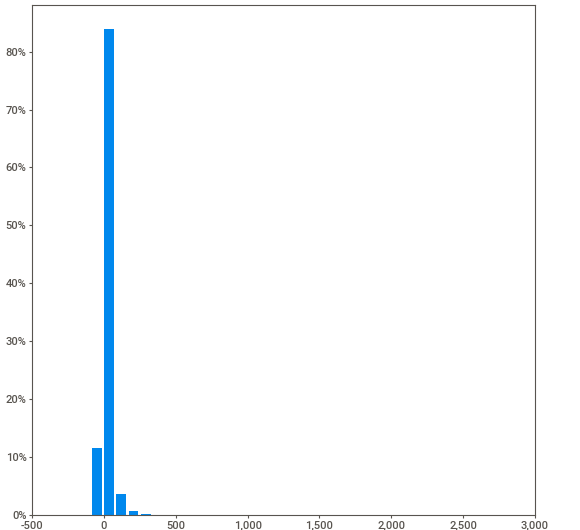
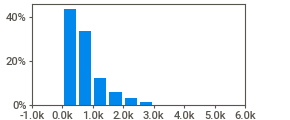
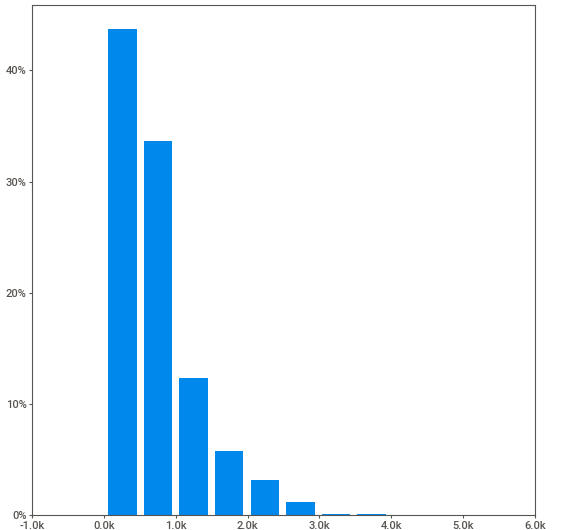
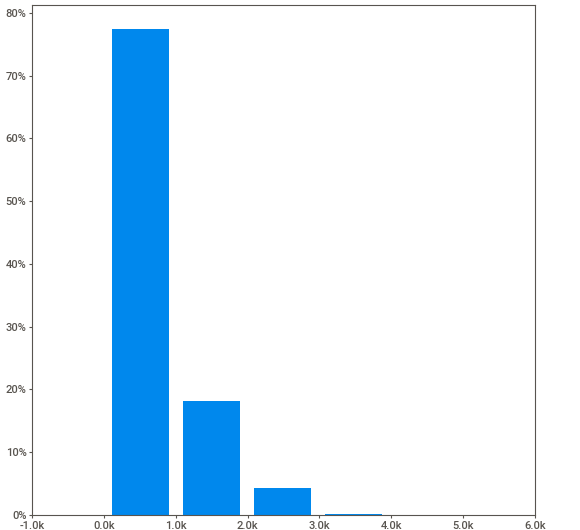
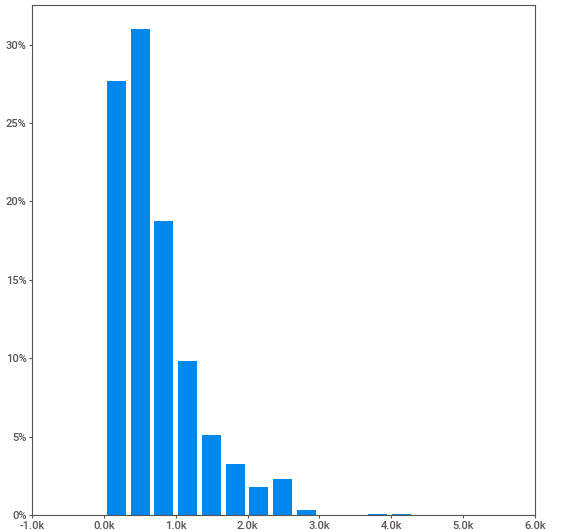
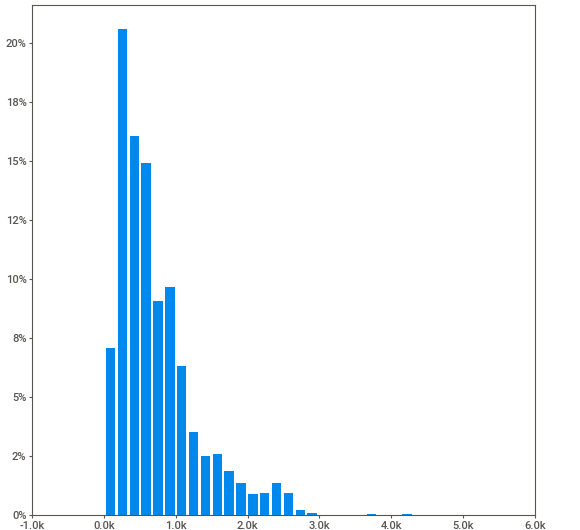
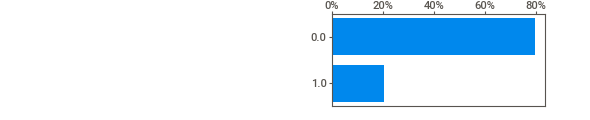
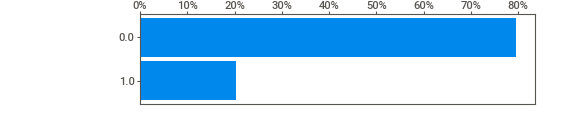
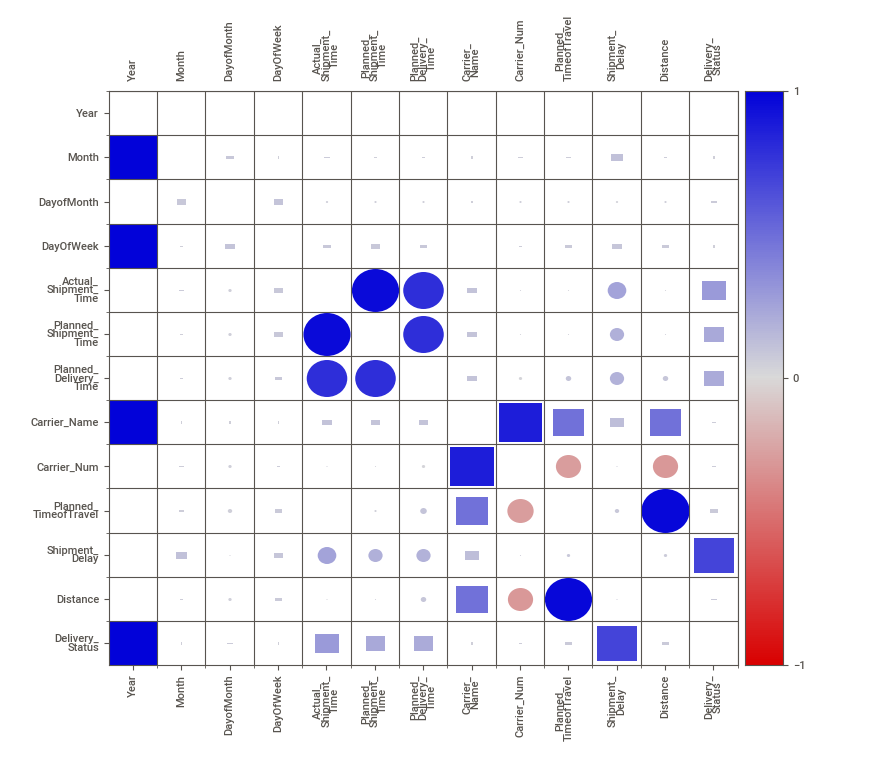
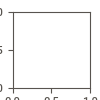

In [67]:
# # Analyzing the dataset
report = sv.analyze(df)

# Display the report
report.show_notebook()  # integrated report in notebook

### Data Wrangling

In [7]:
#Type casting and duplicates handling
## No need to change any dtype since all are correctly mentioned

df.duplicated().sum()

4

In [8]:
#dropping duplicates value
df.drop_duplicates(keep='first', inplace= True)

In [9]:
# checking for nan values 
df.isna().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [10]:
#taking nan values df
train = df[~df['Delivery_Status'].isna()]

#### pre-processing will be done on train dataset only

In [11]:
train.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
Actual_Shipment_Time       0
Planned_Shipment_Time      0
Planned_Delivery_Time      0
Carrier_Name               0
Carrier_Num                0
Planned_TimeofTravel     406
Shipment_Delay             0
Source                     0
Destination                0
Distance                   0
Delivery_Status            0
dtype: int64

In [12]:
#treating nan vaules of Planned_TimeofTravel
# will do random imputation
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer(['Planned_TimeofTravel'])

In [13]:
train['Planned_TimeofTravel'] = pd.DataFrame(random_imputer.fit_transform(train[['Planned_TimeofTravel']]))

In [14]:
train.isna().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Carrier_Num              0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

Year                        AxesSubplot(0.125,0.125;0.0545775x0.755)
Month                    AxesSubplot(0.190493,0.125;0.0545775x0.755)
DayofMonth               AxesSubplot(0.255986,0.125;0.0545775x0.755)
DayOfWeek                AxesSubplot(0.321479,0.125;0.0545775x0.755)
Actual_Shipment_Time     AxesSubplot(0.386972,0.125;0.0545775x0.755)
Planned_Shipment_Time    AxesSubplot(0.452465,0.125;0.0545775x0.755)
Planned_Delivery_Time    AxesSubplot(0.517958,0.125;0.0545775x0.755)
Carrier_Num              AxesSubplot(0.583451,0.125;0.0545775x0.755)
Planned_TimeofTravel     AxesSubplot(0.648944,0.125;0.0545775x0.755)
Shipment_Delay           AxesSubplot(0.714437,0.125;0.0545775x0.755)
Distance                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
Delivery_Status          AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

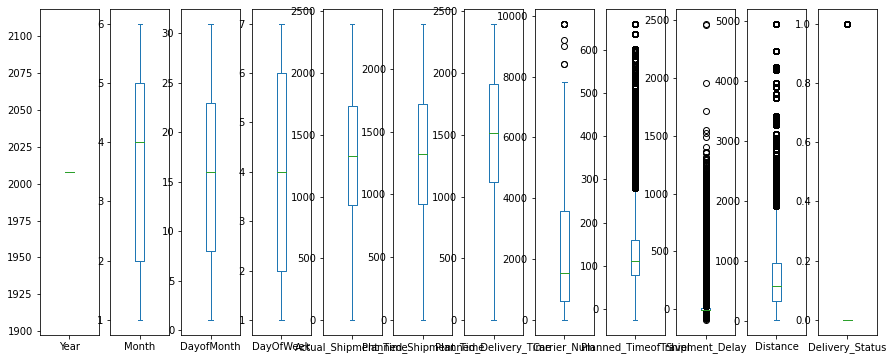

In [15]:
#outlier analysis in train dataset only
train.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 6)) 

### will not do outlier treatment since distance, shipment delay , planned time of travel are some features that are sensitive data.....

In [16]:
# dropping features like year and carrier num since its not important in out prediction
train.drop(['Year', 'Carrier_Num'],axis=1,inplace=True)

In [17]:
train.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003.0,1955,2225,WN,150.0,8.0,IAD,TPA,810,0.0
1,1,3,4,754.0,735,1000,WN,145.0,19.0,IAD,TPA,810,1.0
2,1,3,4,628.0,620,750,WN,90.0,8.0,IND,BWI,515,0.0
3,1,3,4,926.0,930,1100,WN,90.0,-4.0,IND,BWI,515,0.0
4,1,3,4,1829.0,1755,1925,WN,90.0,34.0,IND,BWI,515,1.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522569 entries, 0 to 3604174
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Month                  int64  
 1   DayofMonth             int64  
 2   DayOfWeek              int64  
 3   Actual_Shipment_Time   float64
 4   Planned_Shipment_Time  int64  
 5   Planned_Delivery_Time  int64  
 6   Carrier_Name           object 
 7   Planned_TimeofTravel   float64
 8   Shipment_Delay         float64
 9   Source                 object 
 10  Destination            object 
 11  Distance               int64  
 12  Delivery_Status        float64
dtypes: float64(4), int64(6), object(3)
memory usage: 376.3+ MB


### Will split time features into hours and mints separate feature....except Planned_TimeofTravel since its in mints:->


In [19]:
#converting int to object.
train['Actual_Shipment_Time'] = train['Actual_Shipment_Time'].astype(str)
train['Planned_Shipment_Time'] = train['Planned_Shipment_Time'].astype(str)
train['Planned_Delivery_Time'] = train['Planned_Delivery_Time'].astype(str)

In [20]:
# before splitting hour and mints we will chnage all timeformat into proper hh:mm.
train['Actual_Shipment_Time'] = train['Actual_Shipment_Time'].str.zfill(4)
train['Planned_Shipment_Time'] = train['Planned_Shipment_Time'].str.zfill(4)
train['Planned_Delivery_Time'] = train['Planned_Delivery_Time'].str.zfill(4)

In [21]:
# will split timeformat to hh and mins feature
train['Actual_Shipment_Time_hr'] = train['Actual_Shipment_Time'].str.slice(0, 2)
train['Actual_Shipment_Time_min'] = train['Actual_Shipment_Time'].str.slice(2, 4)

train['Planned_Shipment_Time_hr'] = train['Planned_Shipment_Time'].str.slice(0, 2)
train['Planned_Shipment_Time_min'] = train['Planned_Shipment_Time'].str.slice(2, 4)

train['Planned_Delivery_Time_hr'] = train['Planned_Delivery_Time'].str.slice(0, 2)
train['Planned_Delivery_Time_min'] = train['Planned_Delivery_Time'].str.slice(2, 4)

In [22]:
#will drop time feature in format HHMM
train.drop(['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time'],axis=1,inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522569 entries, 0 to 3604174
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Month                      int64  
 1   DayofMonth                 int64  
 2   DayOfWeek                  int64  
 3   Carrier_Name               object 
 4   Planned_TimeofTravel       float64
 5   Shipment_Delay             float64
 6   Source                     object 
 7   Destination                object 
 8   Distance                   int64  
 9   Delivery_Status            float64
 10  Actual_Shipment_Time_hr    object 
 11  Actual_Shipment_Time_min   object 
 12  Planned_Shipment_Time_hr   object 
 13  Planned_Shipment_Time_min  object 
 14  Planned_Delivery_Time_hr   object 
 15  Planned_Delivery_Time_min  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 456.9+ MB


In [24]:
#will typecast Actual_Shipment_Time_hr object to int 
# Actual_Shipment_Time_min   object 
# Planned_Shipment_Time_hr   object 
# Planned_Shipment_Time_min  object 
# Planned_Delivery_Time_hr   object 
# Planned_Delivery_Time_min  object 

train['Actual_Shipment_Time_hr'] = train['Actual_Shipment_Time_hr'].astype(int)
train['Planned_Shipment_Time_hr'] = train['Planned_Shipment_Time_hr'].astype(int)
train['Planned_Delivery_Time_hr'] = train['Planned_Delivery_Time_hr'].astype(int)

train['Actual_Shipment_Time_min'] = train['Actual_Shipment_Time_min'].astype(float)
train['Actual_Shipment_Time_min'] = train['Actual_Shipment_Time_min'].astype(int)
train['Planned_Shipment_Time_min'] = train['Planned_Shipment_Time_min'].astype(int)
train['Planned_Delivery_Time_min'] = train['Planned_Delivery_Time_min'].astype(int)


In [25]:
#will convert hr to mint and concatinating features to single mins
train['a'] = train['Actual_Shipment_Time_hr']*60
train['b'] = train['Planned_Shipment_Time_hr']*60
train['c'] = train['Planned_Delivery_Time_hr']*60

In [26]:
#merging hours to mint and making it total mins
train['total_Actual_Shipment_Time'] = train['a'] + train['Actual_Shipment_Time_min']
train['total_Planned_Shipment_Time'] = train['b'] + train['Planned_Shipment_Time_min']
train['total_Planned_Delivery_Time'] = train['c'] + train['Planned_Delivery_Time_min']

In [27]:
#dropping hrs, mins column and a b c hr converted column...
train.drop(['Actual_Shipment_Time_hr','Planned_Shipment_Time_hr','Planned_Delivery_Time_hr',
            'a','b','c','Actual_Shipment_Time_min','Planned_Shipment_Time_min',
            'Planned_Delivery_Time_min'],axis=1,inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522569 entries, 0 to 3604174
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Month                        int64  
 1   DayofMonth                   int64  
 2   DayOfWeek                    int64  
 3   Carrier_Name                 object 
 4   Planned_TimeofTravel         float64
 5   Shipment_Delay               float64
 6   Source                       object 
 7   Destination                  object 
 8   Distance                     int64  
 9   Delivery_Status              float64
 10  total_Actual_Shipment_Time   int64  
 11  total_Planned_Shipment_Time  int64  
 12  total_Planned_Delivery_Time  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 376.3+ MB


In [29]:
#will map encode carrier name
train['Carrier_Name'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [30]:
#will map the values so that dont get curse of dimensionality
train['Carrier_Name'] = train['Carrier_Name'].map({'WN':0, 'XE':1, 'YV':2, 'OH':3, 'OO':4, 'UA':5, 'US':6, 
                                                      'DL':7, 'EV':8, 'F9':9, 'FL':10,'HA':11, 'MQ':12, 'NW':13, 
                                                      '9E':14, 'AA':15, 'AQ':16, 'AS':17, 'B6':18, 'CO':19})

In [31]:
# will use label encoding for source and destination
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [32]:
train['Source'] = labelencoder.fit_transform(train['Source'])
train['Destination'] = labelencoder.fit_transform(train['Destination'])

## Without shipment delay feature:

In [33]:
# we can drop shipment delay option since it doesnt corelate with dependent variable
train_sd = train.drop('Shipment_Delay',axis=1)

In [34]:
# will change Delivery_Status to categorical feature since we will use knn classifier to train our model.
train_sd['Delivery_Status'].astype(str)

0          0.0
1          1.0
2          0.0
3          0.0
4          1.0
          ... 
3604170    0.0
3604171    0.0
3604172    0.0
3604173    0.0
3604174    1.0
Name: Delivery_Status, Length: 3522569, dtype: object

In [35]:
train_sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522569 entries, 0 to 3604174
Data columns (total 12 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Month                        int64  
 1   DayofMonth                   int64  
 2   DayOfWeek                    int64  
 3   Carrier_Name                 int64  
 4   Planned_TimeofTravel         float64
 5   Source                       int64  
 6   Destination                  int64  
 7   Distance                     int64  
 8   Delivery_Status              float64
 9   total_Actual_Shipment_Time   int64  
 10  total_Planned_Shipment_Time  int64  
 11  total_Planned_Delivery_Time  int64  
dtypes: float64(2), int64(10)
memory usage: 349.4 MB


In [36]:
# normalize data numerical features, mixmax
def norm_func(i):
    x = (i-i.min())/ (i.max()-i.min())
    return (x)

In [37]:
train_sd1 = norm_func(train_sd.iloc[:,0:8])
train_sd2 = norm_func(train_sd.iloc[:,9:])

In [38]:
train_sdn = pd.concat([train_sd1,train_sd2],axis=1)

In [39]:
train_sdn.head()

,Month,DayofMonth,DayOfWeek,Carrier_Name,Planned_TimeofTravel,Source,Destination,Distance,total_Actual_Shipment_Time,total_Planned_Shipment_Time,total_Planned_Delivery_Time
0,0.0,0.066667,0.5,0.0,0.255474,0.452703,0.942953,0.161382,0.202337,0.830438,0.934028
1,0.0,0.066667,0.5,0.0,0.248175,0.452703,0.942953,0.161382,0.786688,0.316192,0.416667
2,0.0,0.066667,0.5,0.0,0.167883,0.469595,0.161074,0.101798,0.649318,0.264072,0.326389
3,0.0,0.066667,0.5,0.0,0.167883,0.469595,0.161074,0.101798,0.967605,0.396108,0.458333
4,0.0,0.066667,0.5,0.0,0.167883,0.469595,0.161074,0.101798,0.185697,0.747047,0.809028


In [40]:
# Separating the input and output from the dataset

X = np.array(train_sdn.iloc[:, :]) # Predictors 
Y = np.array(train_sd['Delivery_Status']) # Target

In [41]:
#using scikit learn train test split and importing knn and tt split from library

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [42]:
X_train.shape

(2818055, 11)

In [43]:
X_test.shape

(704514, 11)

## Random Forest:--->

In [44]:
#Using random forest classifier 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [45]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [46]:
Y_pred = model.predict(X_test)

In [47]:
# accuracy = model.score(X_test, Y_test)
# ========================================

# compare these generated labels ypred with the true labels ytest to provide a robust evaluation
#of the model performance on unknown data (data not used during training) with tools like confusion matrix, metrics...

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_cm = confusion_matrix(Y_test,Y_pred)
test_report = classification_report(Y_test,Y_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)

In [48]:
test_cm

array([[560323,    305],
       [  6167, 137719]])

In [49]:
test_report

'              precision    recall  f1-score   support\n\n         0.0       0.99      1.00      0.99    560628\n         1.0       1.00      0.96      0.98    143886\n\n    accuracy                           0.99    704514\n   macro avg       0.99      0.98      0.99    704514\nweighted avg       0.99      0.99      0.99    704514\n'

In [50]:
test_accuracy

0.9908135253522287

## With shipment delay feature:

In [51]:
train['Delivery_Status'].astype(str)

0          0.0
1          1.0
2          0.0
3          0.0
4          1.0
          ... 
3604170    0.0
3604171    0.0
3604172    0.0
3604173    0.0
3604174    1.0
Name: Delivery_Status, Length: 3522569, dtype: object

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522569 entries, 0 to 3604174
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Month                        int64  
 1   DayofMonth                   int64  
 2   DayOfWeek                    int64  
 3   Carrier_Name                 int64  
 4   Planned_TimeofTravel         float64
 5   Shipment_Delay               float64
 6   Source                       int64  
 7   Destination                  int64  
 8   Distance                     int64  
 9   Delivery_Status              float64
 10  total_Actual_Shipment_Time   int64  
 11  total_Planned_Shipment_Time  int64  
 12  total_Planned_Delivery_Time  int64  
dtypes: float64(3), int64(10)
memory usage: 376.3 MB


In [53]:
# normalize data numerical features
def norm_func(i):
    x = (i-i.min())/ (i.max()-i.min())
    return (x)

In [54]:
train1 = norm_func(train.iloc[:,0:9])
train2 = norm_func(train.iloc[:,10:])

In [55]:
train_n = pd.concat([train1,train2],axis=1)

In [56]:
train_n.head()

,Month,DayofMonth,DayOfWeek,Carrier_Name,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,total_Actual_Shipment_Time,total_Planned_Shipment_Time,total_Planned_Delivery_Time
0,0.0,0.066667,0.5,0.0,0.255474,0.039078,0.452703,0.942953,0.161382,0.202337,0.830438,0.934028
1,0.0,0.066667,0.5,0.0,0.248175,0.043376,0.452703,0.942953,0.161382,0.786688,0.316192,0.416667
2,0.0,0.066667,0.5,0.0,0.167883,0.039078,0.469595,0.161074,0.101798,0.649318,0.264072,0.326389
3,0.0,0.066667,0.5,0.0,0.167883,0.034388,0.469595,0.161074,0.101798,0.967605,0.396108,0.458333
4,0.0,0.066667,0.5,0.0,0.167883,0.049238,0.469595,0.161074,0.101798,0.185697,0.747047,0.809028


In [57]:
# Separating the input and output from the dataset

X = np.array(train_n.iloc[:, :]) # Predictors 
Y = np.array(train['Delivery_Status']) # Target

In [58]:
#using scikit learn train test split and importing knn and tt split from library

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Random Forest:--->

In [59]:
#Using random forest classifier 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [60]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [61]:
Y_pred = model.predict(X_test)

In [65]:
accuracy = model.score(X_test, Y_test)
# ========================================

# compare these generated labels ypred with the true labels ytest to provide a robust evaluation
#of the model performance on unknown data (data not used during training) with tools like confusion matrix, metrics...

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_cm = confusion_matrix(Y_test,Y_pred)
test_report = classification_report(Y_test,Y_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)

In [63]:
test_cm

array([[560628,      0],
       [     0, 143886]])

In [64]:
test_accuracy

1.0

In [66]:
accuracy

1.0

## Decision Tree:---->

In [68]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [69]:
# Separating the input and output from the dataset

X = np.array(train_sdn.iloc[:, :]) # Predictors 
Y = np.array(train_sd['Delivery_Status']) # Target

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [71]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [72]:
Y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_cm = confusion_matrix(Y_test,Y_pred)
test_report = classification_report(Y_test,Y_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)

In [74]:
test_accuracy

0.9996281124292775

In [76]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.00037188757072251227
Mean Squared Error: 0.00037188757072251227
Root Mean Squared Error: 0.019284386708488095
